# Problem statement - 1

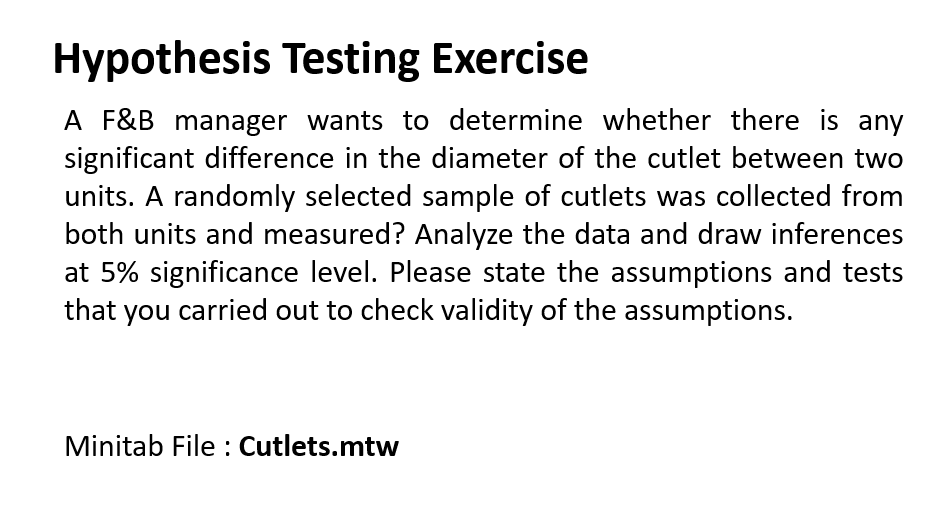

In [1]:
#import libraries
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import chi2_contingency,chisquare

In [2]:
#loading dataset
cutlets=pd.read_csv('Cutlets.csv')
cutlets

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


# EDA

In [3]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [4]:
cutlets.duplicated().sum()

0

# Two sample T-test 

cutlets unit A -> X

cutlets unit B -> Y

H0 -> X==Y

H1 -> X!=Y



In [5]:
X=cutlets['Unit A']
Y=cutlets['Unit B']

In [6]:
stats.ttest_ind( X,Y,alternative="two-sided")

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)

# Inferences

T Statistic = 0.72

sigma = 5

H0 -> 47.22%

H1 -> 52.78%

# Problem statement - 2

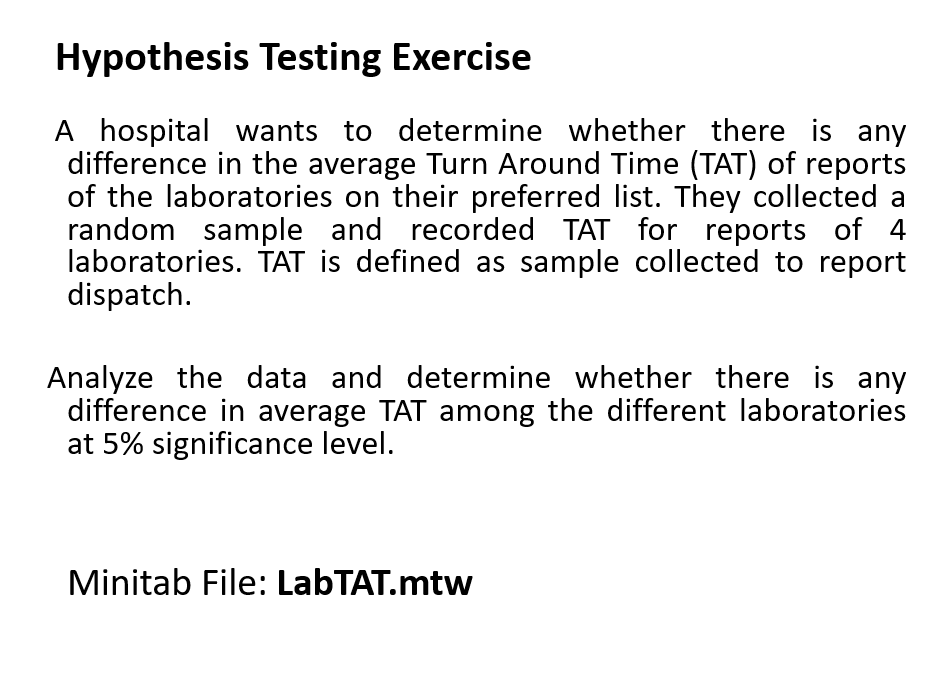

H0 -> x1=x2=x3=x4

h1 -> x1!=x2!=x3!=x4

In [7]:
Tat=pd.read_csv('LabTAT.csv')

In [8]:
Tat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [9]:
p_value=stats.f_oneway(Tat.iloc[:,0],Tat.iloc[:,1],Tat.iloc[:,2],Tat.iloc[:,3])
p_value

F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

In [10]:
p_value[1]

2.1156708949992414e-57

In [11]:
if p_value[1]<0.05:
    print("H0 is rejected and there is difference of tat of all laboratories")
else:
    print("H0 is accepted and there is no difference of tat of all laboratories")

H0 is rejected and there is difference of tat of all laboratories


# Problem Statement - 3

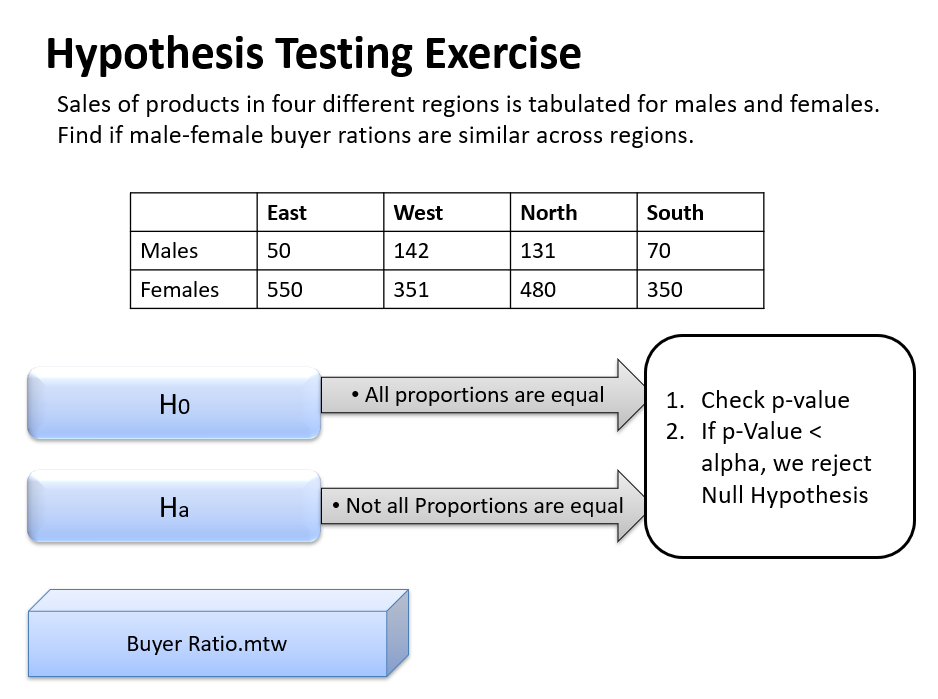

H0 -> Male = Female

h1 -> Male != Female

In [12]:
br=pd.read_csv('BuyerRatio.csv')

In [13]:
br

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [14]:
obs=np.array([[50,142,131,70],[435,1523,1356,750]])

In [15]:
chi2_contingency(obs)

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [16]:
pValue=chi2_contingency(obs)[1]

In [17]:
pValue

0.6603094907091882

In [18]:
if pValue<0.05:
    print("H0 is rejected and there is no Male and female buyers are similar across in region")
else:
    print("H0 is accepted and Male and female buyers are similar across in region")

H0 is accepted and Male and female buyers are similar across in region


# Problem Statement - 4

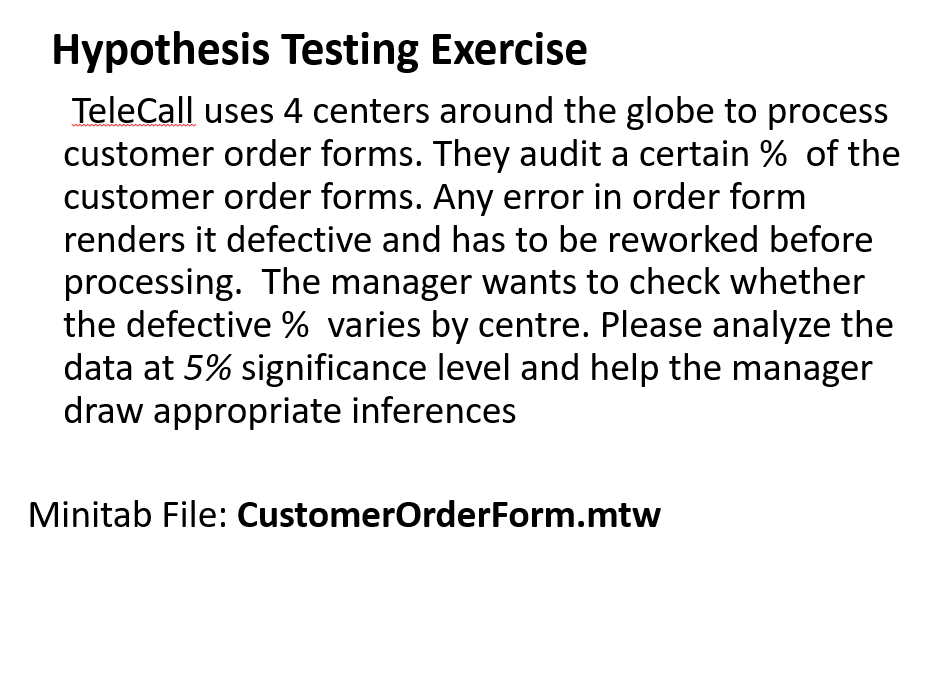

In [20]:
cof=pd.read_csv('Costomer+OrderForm.csv')
cof

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free
...,...,...,...,...
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free


In [21]:
cof.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [22]:
print(cof['Phillippines'].value_counts())
print(cof['Indonesia'].value_counts())
print(cof['Malta'].value_counts())
print(cof['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64
Error Free    267
Defective      33
Name: Indonesia, dtype: int64
Error Free    269
Defective      31
Name: Malta, dtype: int64
Error Free    280
Defective      20
Name: India, dtype: int64


In [23]:
obs1=np.array([[271,267,269,280],[29,33,31,20]])
obs1

array([[271, 267, 269, 280],
       [ 29,  33,  31,  20]])

In [24]:
chi2_contingency(obs1)

(3.858960685820355,
 0.2771020991233135,
 3,
 array([[271.75, 271.75, 271.75, 271.75],
        [ 28.25,  28.25,  28.25,  28.25]]))

In [25]:
pValue1=chi2_contingency(obs1)[1]

In [26]:
pValue1

0.2771020991233135

In [27]:
if pValue<0.05:
    print("H0 is rejected")
else:
    print("H0 is accepted")

H0 is accepted
